Import Dependancies and Load CSVs

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

coverage_df = pd.read_csv("coverageLocations.csv", encoding="utf-8")
description_df = pd.read_csv("descriptionLocations.csv", encoding="utf-8")

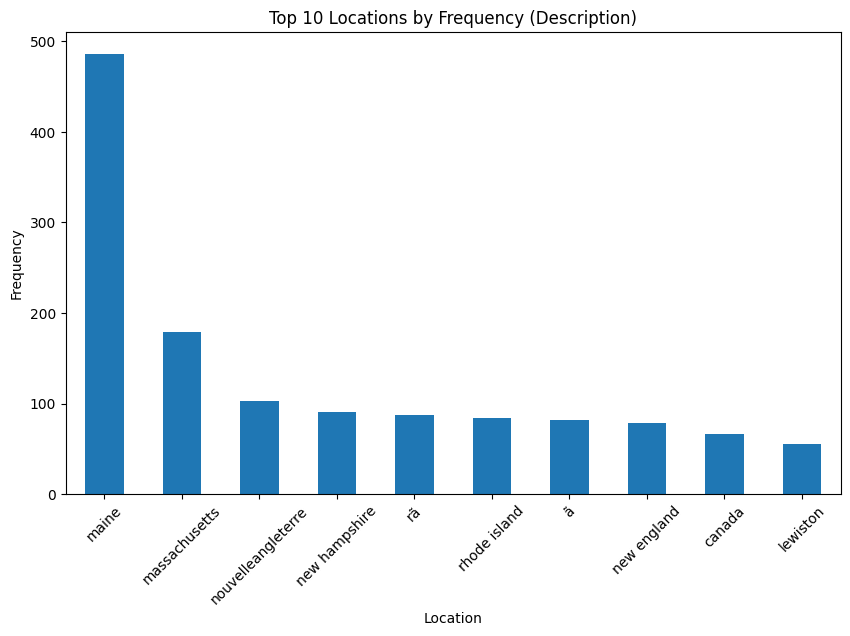

In [31]:
# Count the frequency of each location
location_counts = description_df['location'].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
location_counts.head(10).plot(kind='bar')
plt.title('Top 10 Locations by Frequency (Description)')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


Coverage Location Data

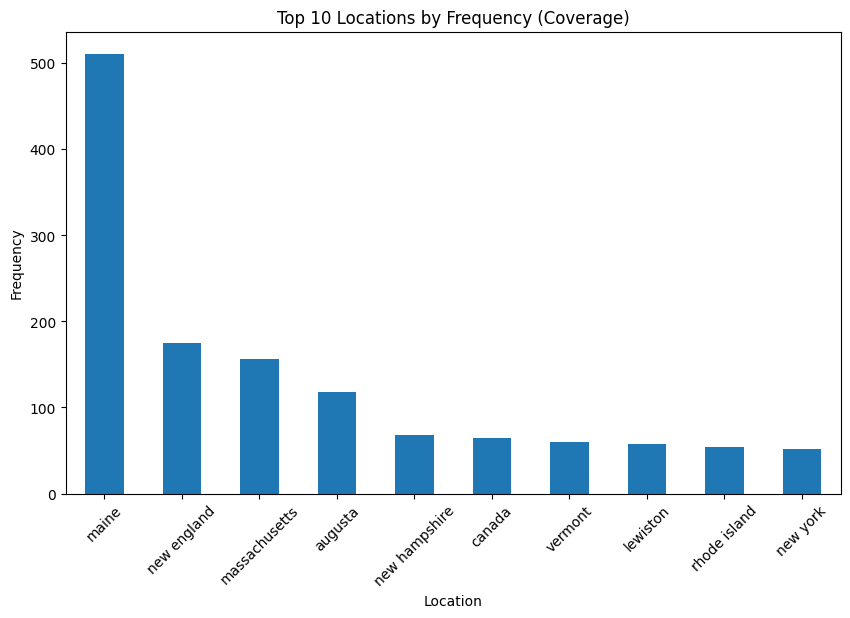

In [33]:
location_counts = coverage_df['location'].value_counts()
# Plot the data
plt.figure(figsize=(10, 6))
location_counts.head(10).plot(kind='bar')
plt.title('Top 10 Locations by Frequency (Coverage)')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Mapping Coverage

In [ ]:
import folium
from geopy.geocoders import Nominatim

# Initialize the geolocator
geolocator = Nominatim(user_agent="location_mapper")

# Create a map
map_center = [20.0, 0.0]
map = folium.Map(location=map_center, zoom_start=2)

# Function to get latitude and longitude from location name
def get_lat_lon(location):
    try:
        loc = geolocator.geocode(location)
        return loc.latitude, loc.longitude
    except:
        return None, None

# Add pins to the map
for location in coverage_df['location']:
    lat, lon = get_lat_lon(location)
    if lat and lon:
        folium.Marker([lat, lon], popup=location).add_to(map)

# Save the map to an HTML file
map.save('C_location_map.html')


Mapping Description

In [37]:
# Initialize the geolocator
geolocator = Nominatim(user_agent="location_mapper")

# Create a map 
map_center = [20.0, 0.0]
map = folium.Map(location=map_center, zoom_start=2)

# Function to get latitude and longitude from location name
def get_lat_lon(location):
    try:
        loc = geolocator.geocode(location)
        return loc.latitude, loc.longitude
    except:
        return None, None

# Add pins to the map
for location in description_df['location']:
    lat, lon = get_lat_lon(location)
    if lat and lon:
        folium.Marker([lat, lon], popup=location).add_to(map)

# Save the map to an HTML file
map.save('D_location_map.html')